In [1]:
#upload the twitter-combined.txt file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
filep= '/content/gdrive/My Drive/IR_AssnDatasets_Sem6/Wiki-Vote.txt'

# display DataFrame
with open(filep) as f:
    edges = [tuple(map(int, line.strip().split())) for line in f if line[0] != '#']

In [3]:
nodes=set()
for i in range(len(edges)):
    nodes.add(edges[i][0])
    nodes.add(edges[i][1])

adj_matrix = [[0] * len(nodes) for _ in range(len(nodes))] #initialise the adjacency matrix

#create a map from given userids to an index number of the node
#reverse map will reverse map the index number of the node back to the user ids. 
map={}
reverse_map={}
count=0
for id in nodes:
  map[id]=count
  reverse_map[count]=id
  count+=1

for n1, n2 in edges:
    adj_matrix[map[n1]][map[n2]] = 1 #adj_matrix stores the adjacency matrix with mapped vertices as indices

#each list in the edge list represents the neighbours of the nodes represented by the index of the list
#appending the second vertex to the list corresponding to the edge 
edge_list={}
for edge in edges:
  src=map[edge[0]]
  dest=map[edge[1]]

  if src not in edge_list:
    edge_list[src]=[]

  edge_list[src].append(dest)

Q.2 1) PageRank score for each node

In [40]:
import networkx as nx
from collections import OrderedDict

#PageRank score of each node in the directed network 
G = nx.DiGraph()

list_edges = []
for key, value in edge_list.items():
  list_edges.append((key,value))

# Add edges (links) between nodes (webpages)
for node, neighbors in list_edges:
    G.add_node(node)  # Add node to the graph
    for neighbor in neighbors:
        G.add_edge(node, neighbor)  # Add edge between node and neighbor

# Calculate PageRank scores
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Sort
# pagerank_scores=dict(sorted(pagerank_scores.items()))
# for i in pagerank_scores:
#   print(i, ": ", pagerank_scores[i])
print(pagerank_scores)

{27: 0.00017349553934328338, 1299: 0.0008141761230496596, 3064: 0.0017851250122027217, 4680: 0.0021500675059293226, 4919: 0.0010508052619841283, 6484: 0.000812430352613478, 0: 0.00020539498232448021, 25: 0.0016986730322136935, 36: 0.0003439790689580259, 51: 0.00034765464971898025, 102: 0.0004398371153454517, 144: 0.0005817197428805889, 169: 0.00029758488331950184, 173: 0.00016083873728146714, 203: 0.0016599199669365457, 257: 0.0013349240914416604, 268: 0.00017367757770305088, 282: 0.00015065607046072744, 330: 0.00017393564565284635, 331: 9.460415271381966e-05, 350: 0.0002892903392357495, 515: 0.00033152691295165287, 529: 0.00010905154270480289, 532: 0.00022615441013923313, 534: 0.00010518825019481072, 538: 0.00019458075864204938, 551: 0.00018151640169193398, 558: 0.0002164090559846353, 7100: 0.0003287923832617068, 22: 5.0487823458630175e-05, 3: 0.00031183250978437466, 5: 0.00032663557615950425, 16: 0.00013112179292607275, 20: 0.0001712239063742033, 26: 0.00018490986415744417, 30: 0.000

Q2. 2) Hub and Authority score for each node

In [5]:
# For calculating hubs and authorities
h, a = nx.hits(G)
# Comparing results
for node in G.nodes():
  print("Node Number ", node, ": ", "Page Rank Score= ", pagerank_scores[node], ",  Hub= ", h[node], " & ", "Authority= ", a[node] )

Streaming output truncated to the last 5000 lines.
Node Number  434 :  Page Rank Score=  5.0487823458630175e-05 ,  Hub=  5.93675859551071e-06  &  Authority=  -9.139946171830226e-21
Node Number  435 :  Page Rank Score=  5.0487823458630175e-05 ,  Hub=  7.448722977934217e-06  &  Authority=  -8.792561927962247e-20
Node Number  436 :  Page Rank Score=  5.0487823458630175e-05 ,  Hub=  6.683995226115996e-06  &  Authority=  -7.632076864293567e-22
Node Number  3569 :  Page Rank Score=  0.00010242162029977101 ,  Hub=  -0.0  &  Authority=  7.78103874730498e-05
Node Number  3571 :  Page Rank Score=  0.00016624346374375038 ,  Hub=  -0.0  &  Authority=  8.66976468461345e-05
Node Number  438 :  Page Rank Score=  5.0487823458630175e-05 ,  Hub=  9.765583344521397e-05  &  Authority=  -1.6369149964984114e-20
Node Number  439 :  Page Rank Score=  5.0487823458630175e-05 ,  Hub=  5.021685661021785e-07  &  Authority=  -3.441892968765941e-22
Node Number  156 :  Page Rank Score=  5.0487823458630175e-05 ,  Hub=

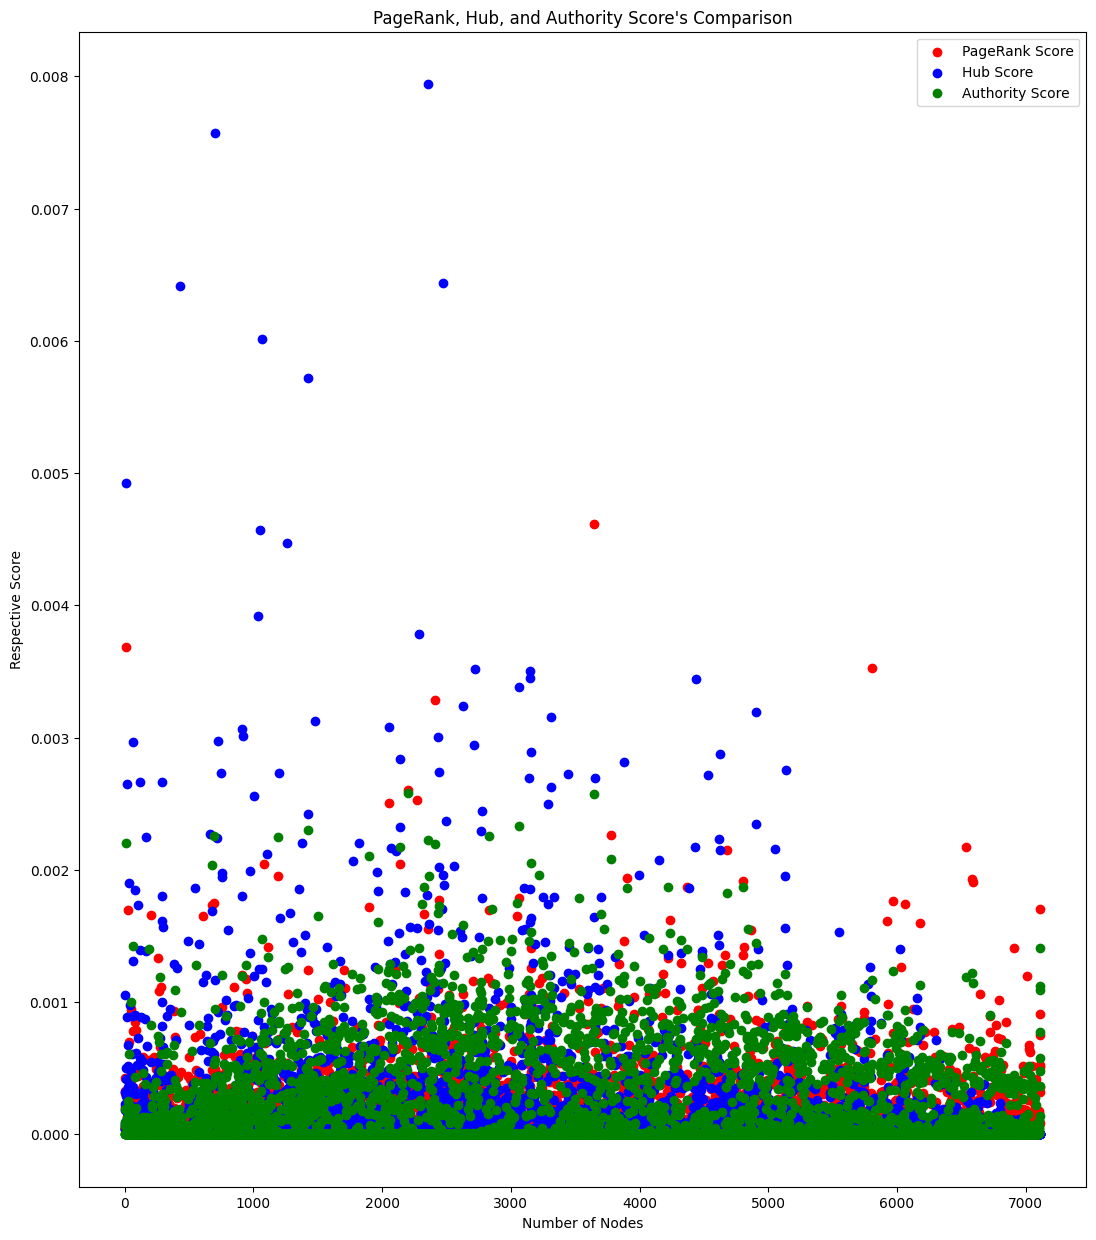

In [6]:
import matplotlib.pyplot as plt

# Create a list of nodes and their scores
nodes = list(G.nodes())
pagerank_scores = list(pagerank_scores.values())
hub_scores = list(h.values())
authority_scores = list(a.values())

# Create a new figure
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(13)


ax.set_title("PageRank, Hub, and Authority Score's Comparison")
ax.scatter(nodes, pagerank_scores, color = 'red', label='PageRank Score')
ax.scatter(nodes, hub_scores, color='blue', label='Hub Score')
ax.scatter(nodes, authority_scores, color='green', label='Authority Score')
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Respective Score')


ax.legend()
plt.show()


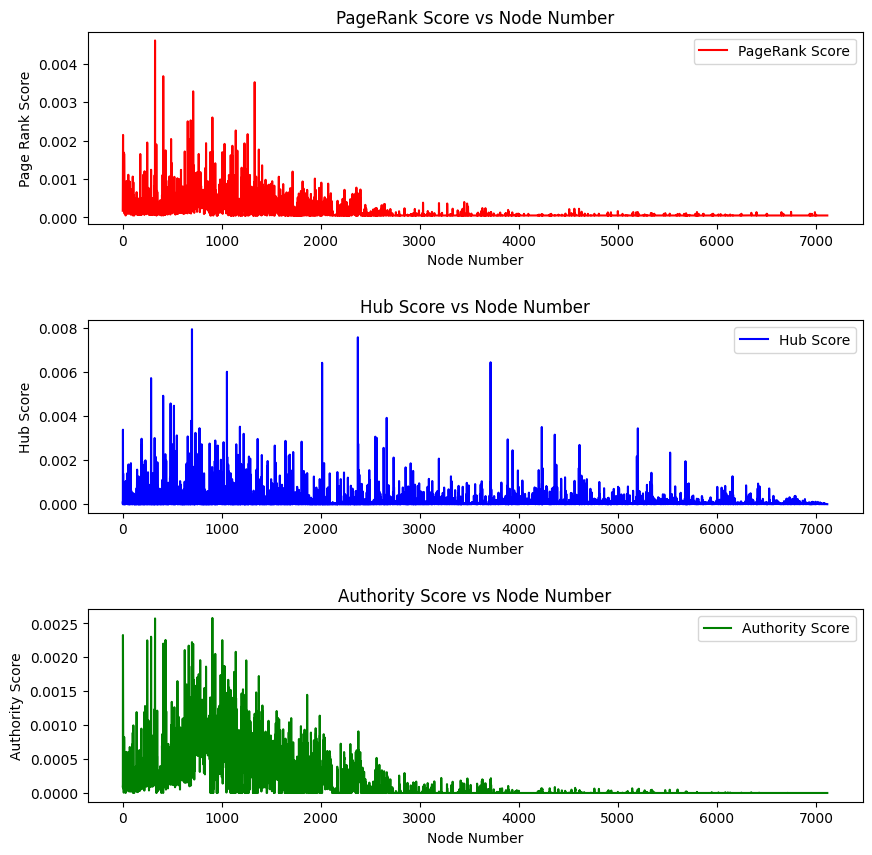

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(10, 10))


# Plot the data on each subplot
ax[0].plot(pagerank_scores, color='red', label='PageRank Score')
ax[0].set_title('PageRank Score vs Node Number')
ax[0].set_xlabel('Node Number')
ax[0].set_ylabel('Page Rank Score')
ax[0].legend()

ax[1].plot(hub_scores, label='Hub Score', color='blue')
ax[1].set_title('Hub Score vs Node Number')
ax[1].set_xlabel('Node Number')
ax[1].set_ylabel('Hub Score')
ax[1].legend()


ax[2].plot(authority_scores, label='Authority Score', color= 'green')
ax[2].set_title('Authority Score vs Node Number')
ax[2].set_xlabel('Node Number')
ax[2].set_ylabel('Authority Score')
ax[2].legend()


plt.subplots_adjust(hspace=0.5)

plt.show()

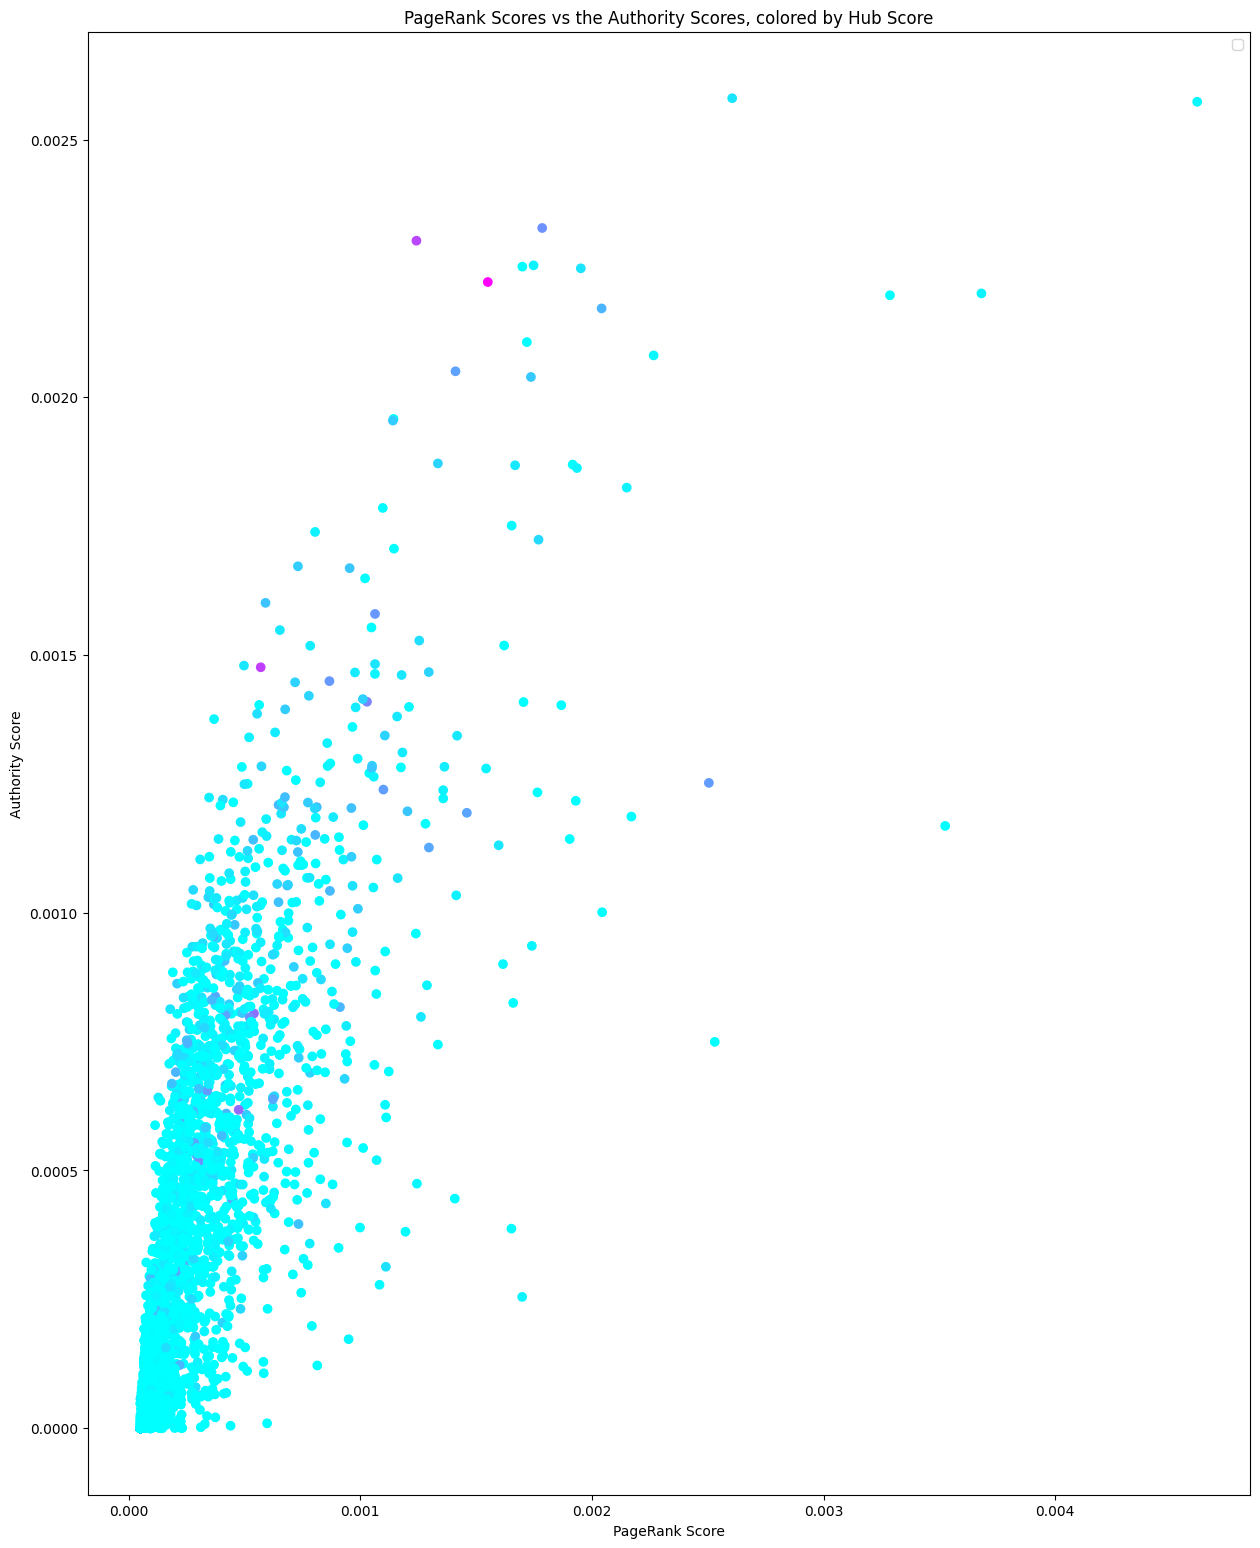

In [37]:
import matplotlib.pyplot as plt
import networkx as nx

# here we crreate a list of node colors based on their respective hub scores
node_colors = [hub_scores[node] for node in G.nodes()]


# here we are creating a scatter plot with the page rank scores on the x-axis and the authority scores on the y-axis, which in the end, are colored by the hub scores
fig, ax = plt.subplots(figsize= (15, 19))
ax.scatter([pagerank_scores[node] for node in G.nodes()], [authority_scores[node] for node in G.nodes()], c=node_colors, cmap='cool')
ax.set_xlabel('PageRank Score')
ax.set_ylabel('Authority Score')
ax.set_title('PageRank Scores vs the Authority Scores, colored by Hub Score')
ax.legend()
plt.show()


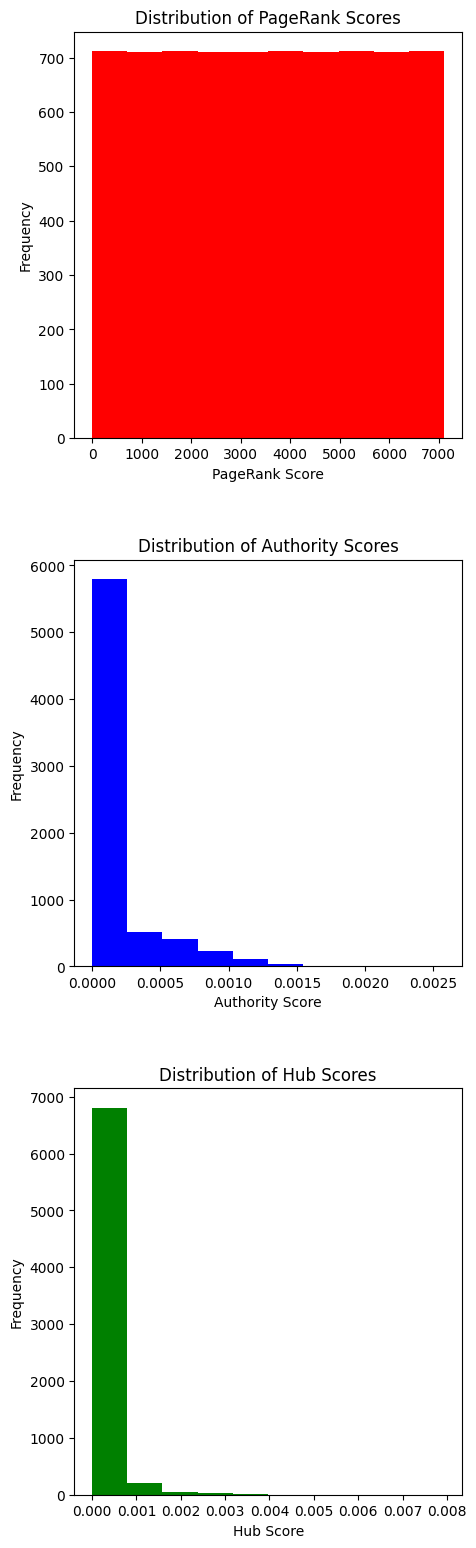

In [68]:
import matplotlib.pyplot as plt
import networkx as nx

# Create histograms for PageRank, Authority, and Hub scores
fig, axs = plt.subplots(3,1 , figsize=(5, 19))

axs[0].hist(pagerank_scores, color= 'red')
axs[0].set_xlabel('PageRank Score')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of PageRank Scores')
# axs[0].legend()

axs[1].hist(authority_scores, color= 'blue')
axs[1].set_xlabel('Authority Score')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Authority Scores')
# axs[1].legend()


axs[2].hist(hub_scores, color= 'green')
axs[2].set_xlabel('Hub Score')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Hub Scores')
# axs[2].legend()
plt.subplots_adjust(hspace=0.3)


# plt.tight_layout()
plt.show()
